<img src="https://j.gifs.com/vO2k6P.gif" alt="Indiana Jones Plane Flying Gif"></img>

# Great Circle Arc and Path

---

## Overview
If you have an introductory paragraph, lead with it here! Keep it short and tied to your material, then be sure to continue into the required list of topics below,

1. Determine the Length/Distance of a Great Circle Arc
1. Determine the Bearing of a Great Circle Arc
1. Generating a Great Circle Arc with Intermediates Points
1. Determine the Midpoint of a Great Circle Arc (TODO)
1. Compare Great Circle Arc to Rhumb Line (TODO)
1. Generate a Great Circle Path

## Prerequisites
This section was inspired by [this template](https://github.com/alan-turing-institute/the-turing-way/blob/master/book/templates/chapter-template/chapter-landing-page.md) of the wonderful [The Turing Way](https://the-turing-way.netlify.app) Jupyter Book.

Following your overview, tell your reader what concepts, packages, or other background information they'll **need** before learning your material. Tie this explicitly with links to other pages here in Foundations or to relevant external resources. Remove this body text, then populate the Markdown table, denoted in this cell with `|` vertical brackets, below, and fill out the information following. In this table, lay out prerequisite concepts by explicitly linking to other Foundations material or external resources, or describe generally helpful concepts.

Label the importance of each concept explicitly as **helpful/necessary**.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Necessary | |
| [Understanding of NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf.html) | Helpful | Familiarity with metadata structure |
| Project management | Helpful | |

- **Time to learn**: estimate in minutes. For a rough idea, use 5 mins per subsection, 10 if longer; add these up for a total. Safer to round up and overestimate.
- **System requirements**:
    - Populate with any system, version, or non-Python software requirements if necessary
    - Otherwise use the concepts table above and the Imports section below to describe required packages as necessary
    - If no extra requirements, remove the **System requirements** point altogether

---

## Imports
Begin your body of content with another `---` divider before continuing into this section, then remove this body text and populate the following code cell with all necessary Python imports **up-front**:

as well $m = a * t / h$ text! Similarly, you have access to other $\LaTeX$ equation [**functionality**](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html) via MathJax (demo below from link),

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

In [8]:
import pandas as pd

In [7]:
# Get all Coordinates for Locations
location_df = pd.read_csv("../location_full_coords.txt")
location_df = location_df.rename(columns=lambda x: x.strip()) # strip excess white space from column names and values
location_df.head()

,name,latitude,longitude,cart_x,cart_y,cart_z,rho,theta,phi,polar_x,polar_y,polar_z
0,arecibo,18.3441,-66.7527,2.389526e+06,-5.562495e+06,2.007347e+06,6378137.0,-1.165054,1.250631,-0.872119,0.374643,0.314723
1,boulder,40.0150,-105.2705,-1.286558e+06,-4.712394e+06,4.101066e+06,6378137.0,1.304276,0.872403,-0.738835,-0.201714,0.642988
2,boston,42.3601,-71.0589,1.529809e+06,-4.457769e+06,4.297512e+06,6378137.0,-1.240212,0.831473,-0.698914,0.239852,0.673788
3,red woods,41.4017,-124.0417,-2.678169e+06,-3.964322e+06,4.218080e+06,6378137.0,0.976657,0.848200,-0.621549,-0.419898,0.661334
4,houston,29.5518,-95.0982,-4.930480e+05,-5.526456e+06,3.145762e+06,6378137.0,1.481816,1.055020,-0.866469,-0.077303,0.493210


In [17]:
location_df.index = location_df["name"]

## Distance Between Points on a Great Circle Arc


### Determine Distance Mathematically

TODO

### Determine Distance Points via Python Package `pyproj`

`pyproj` accounts for different ellipsoids like `WGS-84`

In [10]:
from pyproj import Geod
geodesic = Geod(ellps="WGS84")

In [21]:
location_df.loc[["boulder", "boston"]]

,name,latitude,longitude,cart_x,cart_y,cart_z,rho,theta,phi,polar_x,polar_y,polar_z
name,,,,,,,,,,,,
boulder,boulder,40.0150,-105.2705,-1.286558e+06,-4.712394e+06,4.101066e+06,6378137.0,1.304276,0.872403,-0.738835,-0.201714,0.642988
boston,boston,42.3601,-71.0589,1.529809e+06,-4.457769e+06,4.297512e+06,6378137.0,-1.240212,0.831473,-0.698914,0.239852,0.673788


In [24]:
_, _, distance_meter =  geodesic.inv(location_df.loc[["boulder"]]["longitude"].iloc[0],
                                     location_df.loc[["boulder"]]["latitude"].iloc[0],
                                     location_df.loc[["boston"]]["longitude"].iloc[0],
                                     location_df.loc[["boston"]]["latitude"].iloc[0])

print(f"Distance between coordinates = {distance_meter/1000} km")

Distance between coordinates = 2862.597479914522 km


Compared to the distance from the associated airports in Denver and Boston ([DIA to Logan](https://www.greatcirclemap.com/?routes=DEN-BOS)) which has a distance of 2823 km

## Determine the Bearing of a Great Circle Arc

### Determine the Bearing Mathematically

TODO

### Determine the Bearing via Python Package `pyproj`

`pyproj` accounts for different ellipsoids like `WGS-84`

In [29]:
fwd_bearing, rvs_bearing, _ =  geodesic.inv(location_df.loc[["boulder"]]["longitude"].iloc[0],
                                     location_df.loc[["boulder"]]["latitude"].iloc[0],
                                     location_df.loc[["boston"]]["longitude"].iloc[0],
                                     location_df.loc[["boston"]]["latitude"].iloc[0])

print(f"foward bearing between coordinates = {fwd_bearing} Degrees")
print(f"reverse bearing between coordinates = {rvs_bearing} Degrees")

foward bearing between coordinates = 73.51048829569024 Degrees
reverse bearing between coordinates = -83.57035585674932 Degrees


## Generating a Great Circle Arc with Intermediates Points

### Determine Intermediate Points Mathemetically

TODO

### Determine Intermediate Points via Python Package `pyproj` and `geopy`

1. Interpolate with N total equally spaced number of points
2. Interpolate every N meters

In [31]:
import geopy.distance

def interpolate_points_along_gc(lat_start,
                                lon_start,
                                lat_end,
                                lon_end,
                                distance_between_points_meter): 
    lat_lon_points = [(lat_start, lon_start)]
    
    # move to next point when distance between points is less than the equal distance
    move_to_next_point = True
    while(move_to_next_point):
        forward_bearing, _, distance_meters = geodesic.inv(lon_start,
                                                            lat_start, 
                                                            lon_end,
                                                            lat_end)
        if distance_meters < distance_between_points_meter:
            # ends before overshooting
            move_to_next_point = False
        else:
            start_point = geopy.Point(lat_start, lon_start)
            distance_to_move = geopy.distance.distance(
                            kilometers=distance_between_points_meter /
                            1000)  # distance to move towards the next point
            final_position = distance_to_move.destination(
                            start_point, bearing=forward_bearing)
            lat_lon_points.append((final_position.latitude, final_position.longitude))
            # new starting position is newly found end position
            lon_start, lat_start = final_position.longitude, final_position.latitude
    lat_lon_points.append((lat_end, lon_end))
    return lat_lon_points

### Plot Arcs as Points on a World Map

In [42]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

def plot_coordinate(lst_of_coords=None, title=None):
    # Set up world map plot on the United States
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -130, -60, 20, 60
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")
    
    # Plot Latitude/Longitude Location
    longitudes = [x[1] for x in lst_of_coords] # longitude
    latitudes = [x[0] for x in lst_of_coords] # latitude
    plt.plot(longitudes, latitudes)
    plt.scatter(longitudes, latitudes)
    
    # Setup Axis Limits and Title/Labels
    plt.title(title)
    plt.show()

#### Interpolate with N Total Equally Spaced Points

In [45]:
n_total_points = 10 # total points (n points)
distance_between_points_meter = distance_meter / (n_total_points + 1)
print(f"Each point will be seperated by {distance_between_points_meter} meters ({distance_between_points_meter/1000} km)")

Each point will be seperated by 260236.1345376838 meters (260.2361345376838 km)


In [46]:
lat_start, lon_start = location_df.loc[["boulder"]]["latitude"].iloc[0], location_df.loc[["boulder"]]["longitude"].iloc[0]
lat_end, lon_end = location_df.loc[["boston"]]["latitude"].iloc[0], location_df.loc[["boston"]]["longitude"].iloc[0]

every_n_pts = interpolate_points_along_gc(lat_start,
                                          lon_start,
                                          lat_end,
                                          lon_end,
                                          distance_between_points_meter)
print(f"{len(every_n_pts)} Total Points")
every_n_pts

12 Total Points


[(40.015, -105.2705),
 (40.64283438472448, -102.32002071588883),
 (41.19386139956729, -99.31719425393653),
 (41.665293789240074, -96.2672998277903),
 (42.054648659580415, -93.17653047007545),
 (42.35980367525436, -90.05192021556941),
 (42.57904824130258, -86.90123344627509),
 (42.711126897374584, -83.73281874084785),
 (42.75527239726805, -80.55543262504408),
 (42.71122644219359, -77.37804142647052),
 (42.57924674954763, -74.20961159223958),
 (42.3601, -71.0589)]

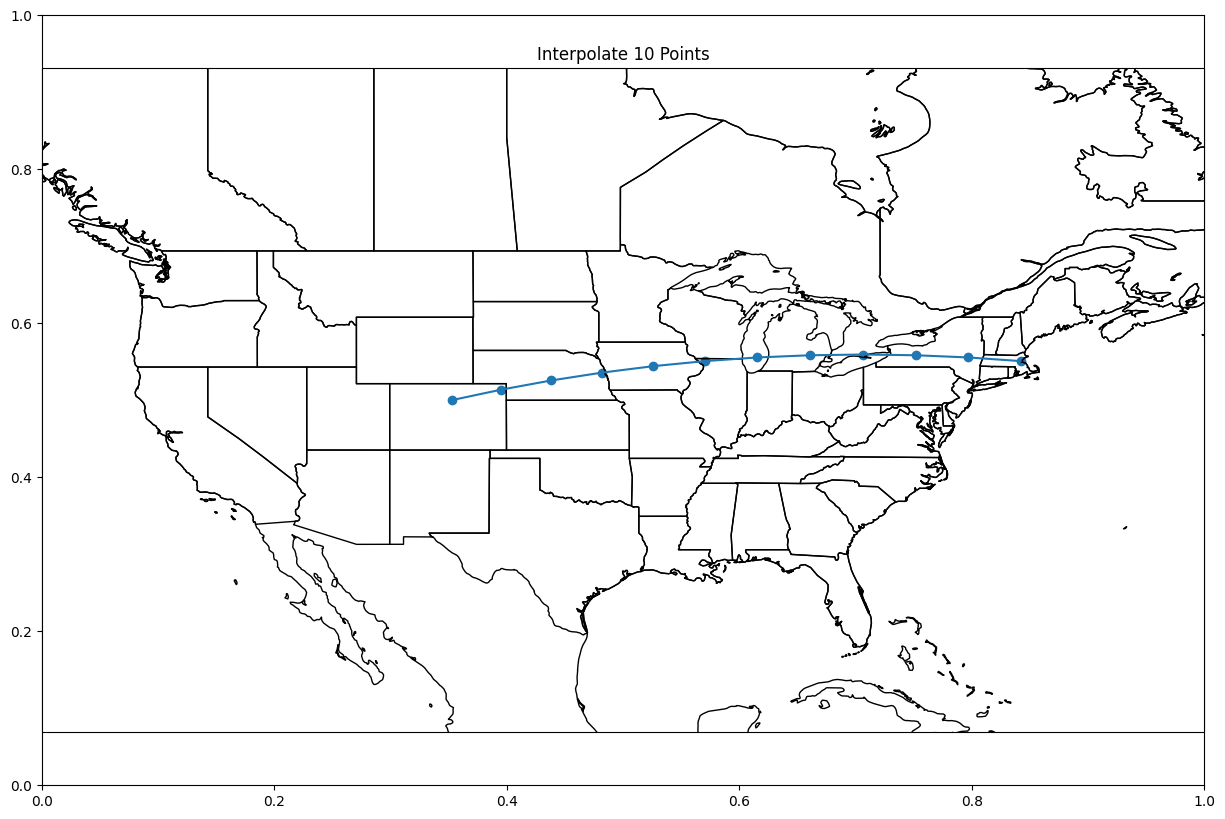

In [48]:
plot_coordinate(lst_of_coords=every_n_pts,
                title=f"Interpolate {n_total_points} Points")

#### Interpolate every N meters

In [52]:
distance_between_points_meter = 112000
print(f"Each point will be seperated by {distance_between_points_meter} meters ({distance_between_points_meter/1000} km)")

Each point will be seperated by 112000 meters (112.0 km)


In [51]:
lat_start, lon_start = location_df.loc[["boulder"]]["latitude"].iloc[0], location_df.loc[["boulder"]]["longitude"].iloc[0]
lat_end, lon_end = location_df.loc[["boston"]]["latitude"].iloc[0], location_df.loc[["boston"]]["longitude"].iloc[0]

every_n_pts = interpolate_points_along_gc(lat_start,
                                          lon_start,
                                          lat_end,
                                          lon_end,
                                          distance_between_points_meter)
print(f"{len(every_n_pts)} Total Points")
every_n_pts

27 Total Points


[(40.015, -105.2705),
 (40.2944315242048, -104.00739372929635),
 (40.55994883031887, -102.73410083358552),
 (40.8113122094977, -101.45097760323465),
 (41.0482901063323, -100.1584131314004),
 (41.27065999040771, -98.85682902091183),
 (41.478209225696254, -97.54667886388198),
 (41.6707359307123, -96.22844748540263),
 (41.84804982201719, -94.90264994540802),
 (42.00997303342117, -93.56983029584391),
 (42.15634090309507, -92.23056009359968),
 (42.287002720790326, -90.88543667319327),
 (42.40182242747838, -89.5350811868695),
 (42.50067925996674, -88.18013642349814),
 (42.583468333429785, -86.82126442135146),
 (42.65010115530706, -85.45914389340658),
 (42.70050606466465, -84.09446748716027),
 (42.73462859187762, -82.72793890397026),
 (42.75243173435998, -81.36026990555978),
 (42.75389614502746, -79.99217723746457),
 (42.73902023120852, -78.624379500797),
 (42.707820162798164, -77.2575940047039),
 (42.66032978955508, -75.8925336322703),
 (42.59660046855048, -74.52990375235942),
 (42.516700803

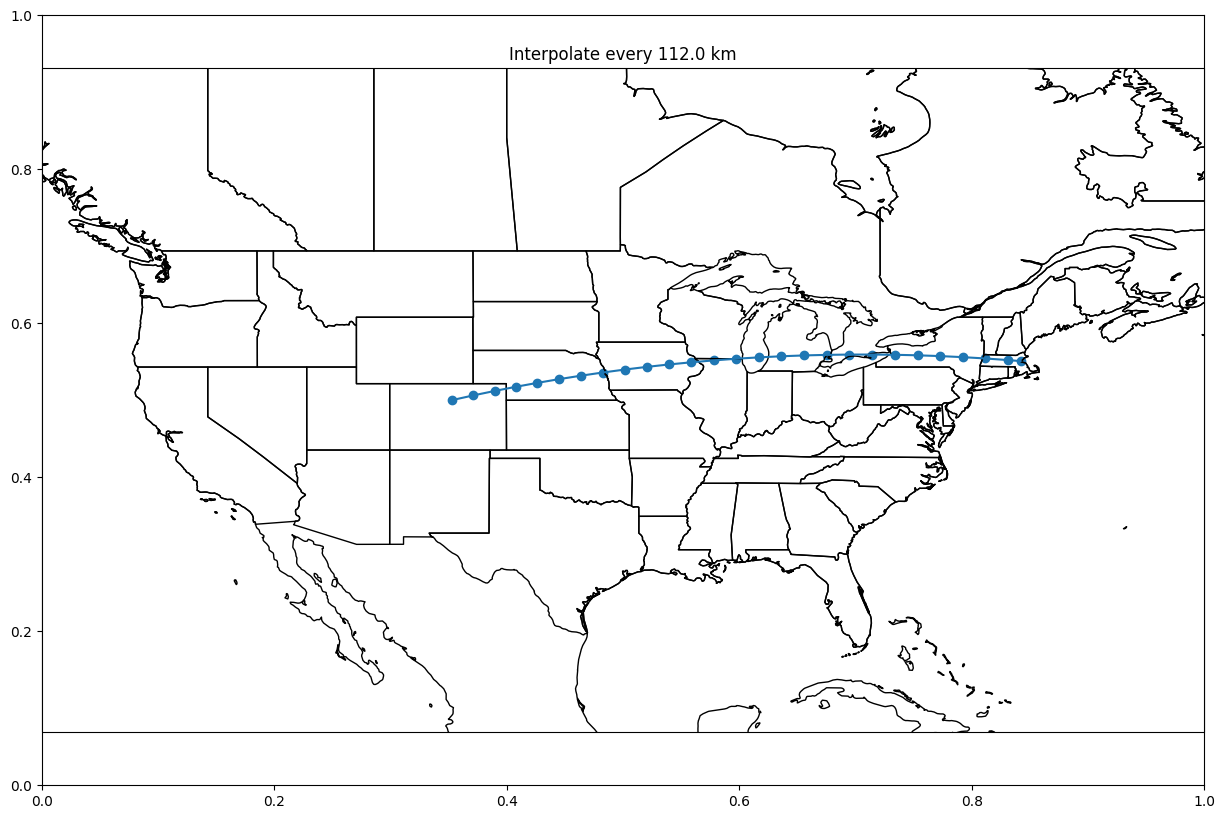

In [54]:
plot_coordinate(lst_of_coords=every_n_pts,
                title=f"Interpolate every {distance_between_points_meter/1000} km")

### Generate a Great Circle Path

Get points on the Great Cricle defined by two points

In [61]:
import numpy as np

In [62]:
# Generate Latitude Coordinates based on Longitude Coordinates
def generate_latitude_along_gc(start_point=None, end_point=None, longitude_lst=None):
    lon1 = np.deg2rad(location_df.loc[[start_point]]["longitude"].iloc[0])
    lat1 = np.deg2rad(location_df.loc[[start_point]]["latitude"].iloc[0])
    lon2 = np.deg2rad(location_df.loc[[end_point]]["longitude"].iloc[0])
    lat2 = np.deg2rad(location_df.loc[[end_point]]["latitude"].iloc[0])

    # Verify not meridian (longitude passes through the poles)
    if np.sin(lon1 - lon2) == 0:
        print("Invalid inputs: start/end points are meridians")
        print("TODO: Fix for plotting meridians")
        # TODO: fix for plotting meridians at 0 longitude through all latitudes
        meridians = np.arange(-90, 90, 180/len(longitude_lst)) # split in n number
        return meridians
        

    # verify not anitpodal (diametrically opposite, points)
    if lat1 + lat2 == 0 and abs(lon1-lon2) == np.pi:
        print("Invalid inputs: start/end points are antipodal")
        return []

    # note: can be expanded to handle input of np arrays by filter out antipodal/merdiain points
    
    lon_lst = np.deg2rad(longitude_lst)

    gc_lat = []
    # Intermediate points on a great circle: https://edwilliams.org/avform147.htm"
    for gc_lon in lon_lst:
        num = np.sin(lat1)*np.cos(lat2)*np.sin(gc_lon-lon2)-np.sin(lat2)*np.cos(lat1)*np.sin(gc_lon-lon1)
        den = np.cos(lat1)*np.cos(lat2)*np.sin(lon1-lon2)
        new_lat = np.arctan(num/den)
        gc_lat.append(np.rad2deg(new_lat))
    return gc_lat

In [72]:
def arc_points(start_lat=None,
               start_lon=None,
               end_lat=None,
               end_lon=None,
               n_total_points=10):
    _, _, distance_meter =  geodesic.inv(start_lon,
                                        start_lat,
                                        end_lon,
                                        end_lat)
        
    distance_between_points_meter = distance_meter / (n_total_points + 1)

    
    points_along_arc = interpolate_points_along_gc(start_lat,
                                              start_lon,
                                              end_lat,
                                              end_lon,
                                              distance_between_points_meter)
    return points_along_arc

In [63]:
# generate n total number of longitude points along the great circle
# https://github.com/rspatial/geosphere/blob/master/R/greatCircle.R#L18C3-L18C7
def generate_longitude_along_gc(n_pts=None):
    gc_lon = []
    for lon in range(1, n_pts+1):
        new_lon = (lon  * (360/n_pts) - 180)
        gc_lon.append(new_lon)
    return gc_lon

In [77]:
def plot_coordinate(lat_lst=None, lon_lst=None,
                    start_point=None, end_point=None,
                    title=None):
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -180, 180, -90, 90
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor="grey")
    
    
    # Plot Latitude/Longitude Location of great circle path
    plt.plot(lon_lst, lat_lst)
    plt.scatter(lon_lst, lat_lst)

    # Overly great circle with arc rom start/end point
    start_end_lat_lon = arc_points(location_df.loc[[start_point]]["latitude"].iloc[0],
                                   location_df.loc[[start_point]]["longitude"].iloc[0],
                                  location_df.loc[[end_point]]["latitude"].iloc[0],
                                   location_df.loc[[end_point]]["longitude"].iloc[0],
                                   n_total_points=20)
    longitudes = [x[1] for x in start_end_lat_lon] # longitude
    latitudes = [x[0] for x in start_end_lat_lon] # latitude
    plt.plot(longitudes, latitudes, c="red")
    plt.scatter(longitudes, latitudes, c="red")
    
    # Setup Axis Limits and Title/Labels
    plt.title(title)
    plt.show()

In [78]:
n = 360
lon_pts = generate_longitude_along_gc(n)

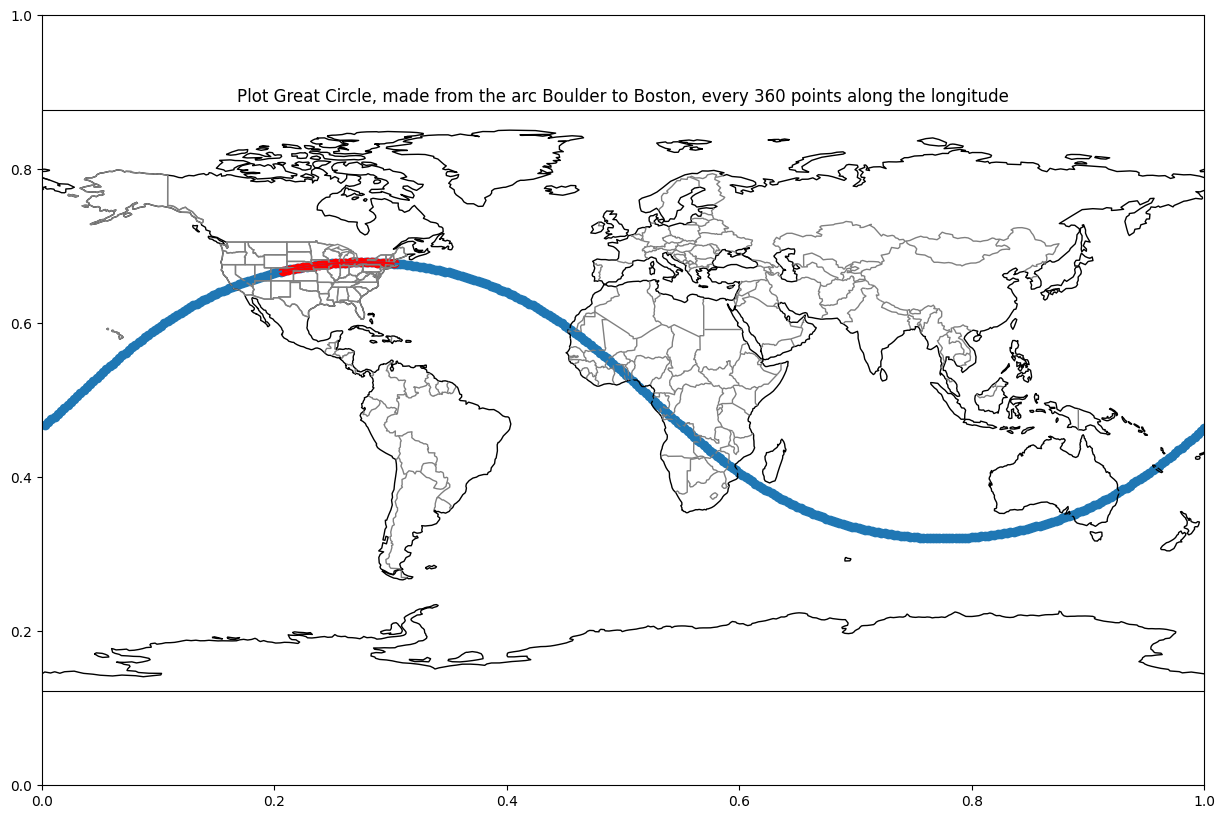

In [83]:
start_pt = "boulder"
end_pt = "boston"
lat_pts = generate_latitude_along_gc(start_pt, end_pt, lon_pts)
plot_coordinate(lat_pts, lon_pts, start_pt, end_pt,
                f"Plot Great Circle, made from the arc {start_pt.title()} to {end_pt.title()}, every {n} points along the longitude")

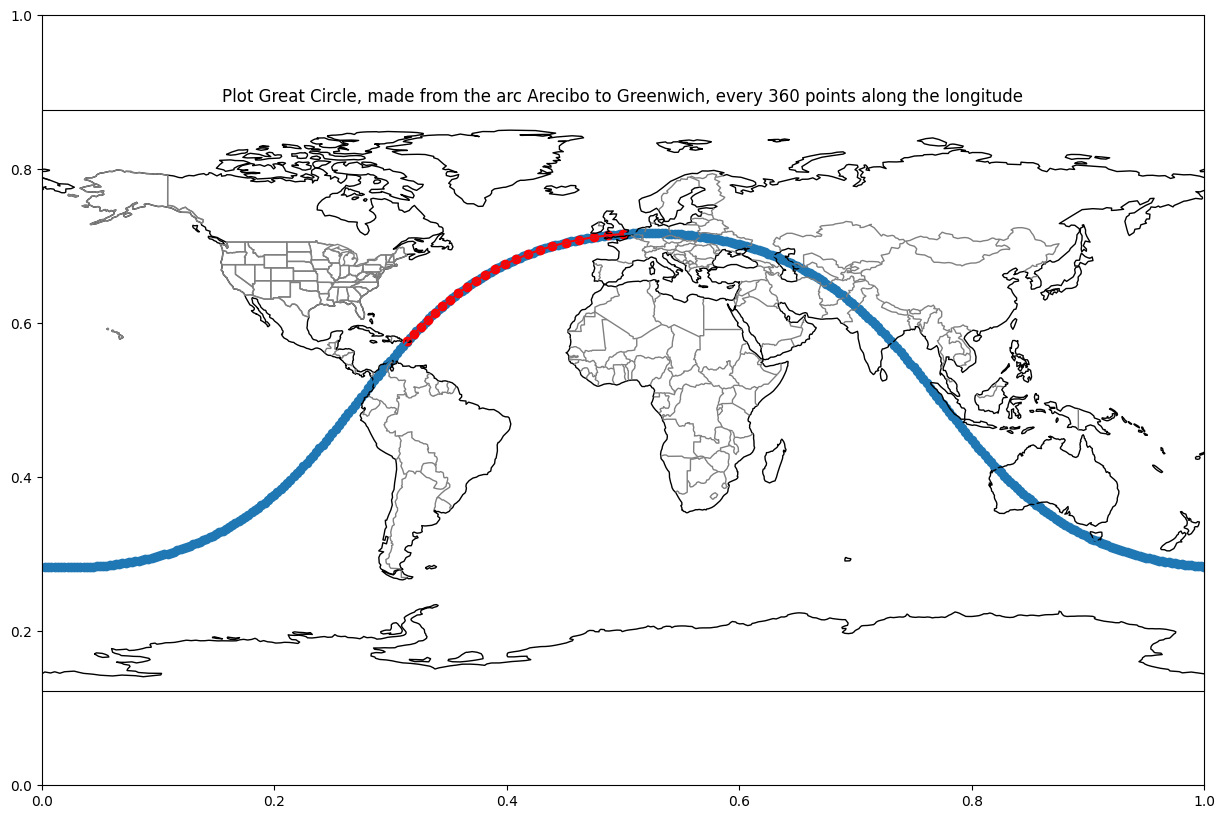

In [85]:
start_pt = "arecibo"
end_pt = "greenwich"
lat_pts = generate_latitude_along_gc(start_pt, end_pt, lon_pts)
plot_coordinate(lat_pts, lon_pts, start_pt, end_pt,
                f"Plot Great Circle, made from the arc {start_pt.title()} to {end_pt.title()}, every {n} points along the longitude")

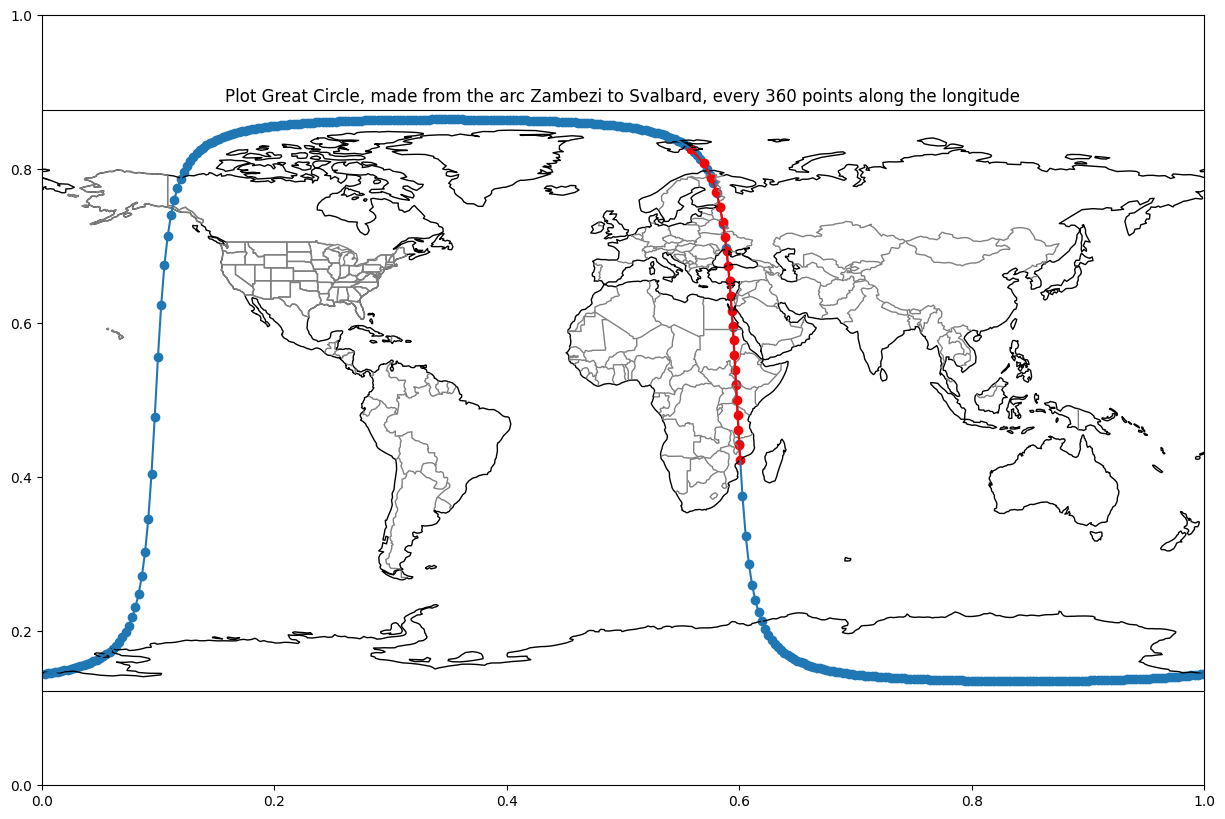

In [86]:
start_pt = "zambezi"
end_pt = "svalbard"
lat_pts = generate_latitude_along_gc(start_pt, end_pt, lon_pts)
plot_coordinate(lat_pts, lon_pts, start_pt, end_pt,
                f"Plot Great Circle, made from the arc {start_pt.title()} to {end_pt.title()}, every {n} points along the longitude")

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!